## Concavity study

In [4]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

In [398]:
m = lambda x: 3**(x-3)
#m = lambda x: (x/4) + 0.25
#m = lambda x: ((3*x)**0.5)/3

In [399]:
def merit(candidate=(), company=()):
    result = 0
    for can, com in zip(candidate, company):
        result += (m(can) - m(com))*m(com)
    return result / sum([m(com) for com in company])

In [400]:
variables = list(itertools.product([0, 1, 2, 3], repeat=3))
companies_weights = list(map(
    lambda x: { "company": x, "weights": x, "candidates_merits": [] },
    variables
))
for company in companies_weights:
    for candidate in companies_weights:
        numerator = merit(candidate['weights'], company['weights'])
        company["candidates_merits"].append(numerator)

In [401]:
def difficulty_level(*attrs):
    result = 0
    for attr in attrs:
        result += m(attr)
    return result

## Plot percentage

In [402]:
def plot_percentage_ds(variables):
    return list(map(
        lambda com: {
            "difficulty_level": [difficulty_level(*com), com],
            "merits": filter_above(variables, com)
        },
        variables
    ))
    

def filter_above(candidates, company):
    results = []
    for candidate in candidates:
        merit = merit_down(candidate, company)
        if merit >= 0:
            results.append([merit, candidate])
    return results

In [403]:
plot_difs = plot_percentage_ds(variables)

In [404]:
x = [_x['difficulty_level'][0] for _x in plot_difs]
y = [len(_x['merits']) for _x in plot_difs]

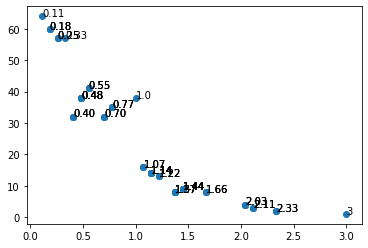

In [405]:
plt.scatter(x, y, marker='o')
for x_, y_ in zip(x, y):
    plt.text(x_, y_, str(x_)[:4])

In [ ]:
list(filter(lambda x: x['difficulty_level'][0] == 0.37037037037037035 or x['difficulty_level'][0] == 0.4444444444444444 , plot_difs))[:2]

## Plot

#### Colorful

In [31]:
merits = np.array(list(map(lambda x: x["candidates_merits"], companies_weights)))

#### Binary

In [36]:
merits = np.array(list(map(
    lambda x: list(map(lambda y: 1 if y >= 0 else 0, x["candidates_merits"])),
    companies_weights
)))

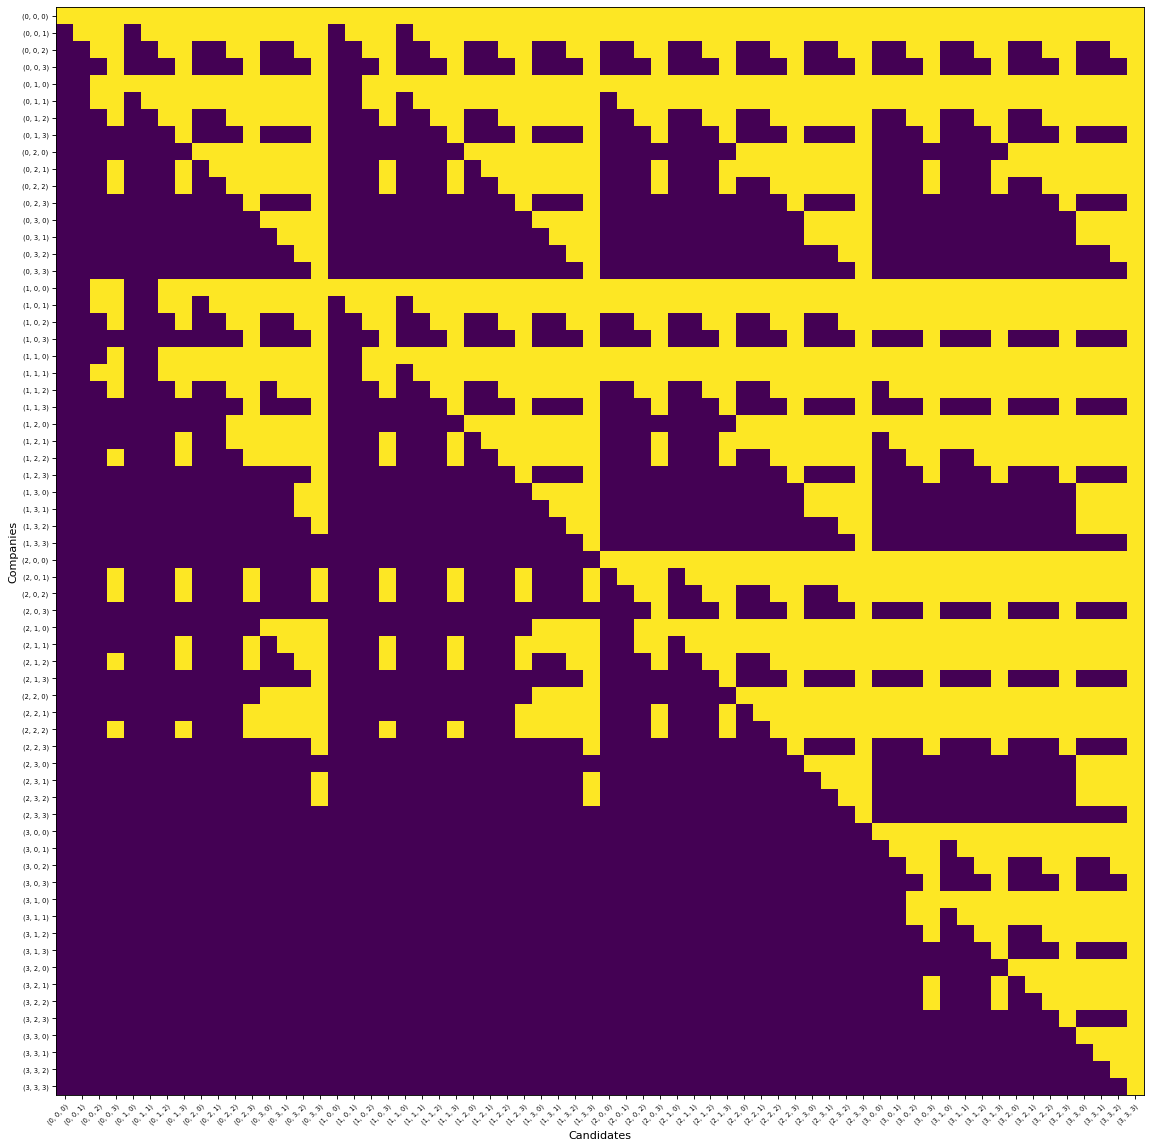

In [19]:
companies = candidates = variables

fig, ax = plt.subplots(figsize=(24, 18), dpi=80)
im = ax.imshow(merits)

ax.set_xlabel('Candidates')
ax.set_ylabel('Companies')

ax.set_xticks(np.arange(len(candidates)))
ax.set_yticks(np.arange(len(companies)))

ax.set_xticklabels(candidates, fontsize=6)
ax.set_yticklabels(companies, fontsize=6)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
# Running the commented code causes an error when the svg is opened
#for i in range(len(companies)):
#    for j in range(len(candidates)):
#        ax.annotate(merits_colorful[i, j], (j, i), fontsize=0.5)
plt.show()
#plt.savefig('result-binary-4.svg', format='svg', dpi=1200)